In [1]:
import os 
import shutil
from os.path import join as path_join
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib
import datetime
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape
from keras import backend as K
from keras.optimizers import RMSprop
matplotlib.use('Agg')


import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# cat 0 dog 1
def get_train_data(base_path='./data/image/'):
    data = {'filename': [], 'label': []}
    files = os.listdir(base_path)
    for f in files:
        label = f.split('.')[0]
        data['filename'].append(f)
        data['label'].append(label)
    return pd.DataFrame(data)
            

# Model


In [123]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape
from keras import backend as K

def naive_model():
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    return model

def kaggle_model():

    model = Sequential()

    model.add(Conv2D(32, (3,3), input_shape=input_shape, activation='relu'))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(Conv2D(128, (3,3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(Conv2D(256, (3,3), activation='relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

def VGG_19(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='softmax'))
    model.add(Activation('sigmoid'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model

# Parameters

In [124]:
img_width, img_height = 150, 150
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
    
# Train Setting
epochs = 50
batch_size = 16
train_size = 1000
nb_train_samples = train_size // 4 * 3
nb_validation_samples = train_size // 4

# Model Setting
suf = str(datetime.date.today())
model_func = VGG_19
objective = 'binary_crossentropy'
optimizer = RMSprop(lr=1e-4)

In [125]:
import datetime
def save_model(model):
    model.save_weights('./models/t{}-s{}-e{}-b{}-{}image.h5'.format(suf, train_size, epochs, batch_size, model_func.__name__))

In [126]:
data = get_train_data()

In [102]:
data, target = data['filename'], data['label']

In [103]:
data, target = data.iloc[:train_size], target.iloc[:train_size]

In [104]:
train_x, test_x , train_y, test_y = train_test_split(data, target, random_state=2333)

In [105]:
base_path='./data/'
image_paht = path_join(base_path, 'image')
train_path = path_join(base_path, 'train')
valid_path = path_join(base_path, 'valid')
train_dog_path = path_join(train_path, 'dogs')
train_cat_path = path_join(train_path, 'cats')
test_dog_path = path_join(valid_path, 'dogs')
test_cat_path = path_join(valid_path, 'cats')

In [106]:
def split_train_test_to_folder(train_x, train_y, test_x, test_y):
    for path in [train_dog_path, train_cat_path, test_dog_path, test_cat_path]:
        if not os.path.exists(path):
            os.makedirs(path)
    for filename, label in zip(train_x, train_y):
        src = path_join(image_paht, filename)
        if label == 'dog':
            dst = path_join(train_dog_path, filename)
        else :
            dst = path_join(train_cat_path, filename)
        shutil.copy(src, dst)
    for filename, label in zip(test_x, test_y):
        src = path_join(image_paht, filename)
        if label == 'dog':
            dst = path_join(test_dog_path, filename)
        else :
            dst = path_join(test_cat_path, filename)
        shutil.copy(src, dst)

In [107]:
split_train_test_to_folder(train_x, train_y, test_x, test_y)

### Keras image Generator

In [108]:
from keras.preprocessing.image import ImageDataGenerator

In [109]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
train_data_generator = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
)

In [110]:
import random

(499, 375)
Cat Sample


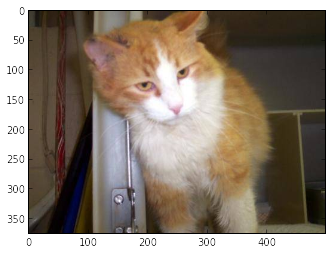

In [111]:
cat = load_img('data/train/cats/{}'.format(random.choice(os.listdir('data/train/cats/'))))
print(cat.size)
print("Cat Sample")
plt.imshow(cat)

(219, 162)
Dog Sample


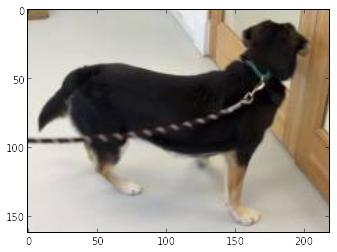

In [112]:
dog = load_img('data/train/dogs/{}'.format(random.choice(os.listdir('data/train/dogs/'))))
print(dog.size)
print("Dog Sample")
plt.imshow(dog)

(375, 499, 3)


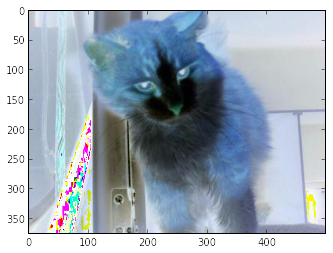

In [113]:
x = img_to_array(cat)
print(x.shape)
plt.imshow(x)

In [114]:
x = x.reshape((1,) + x.shape)
print(x.shape)

(1, 375, 499, 3)


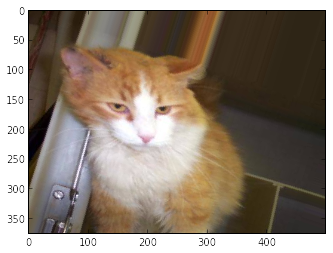

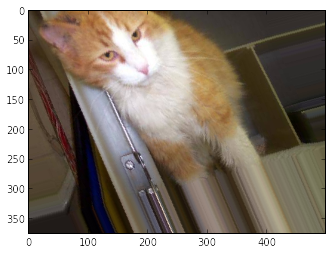

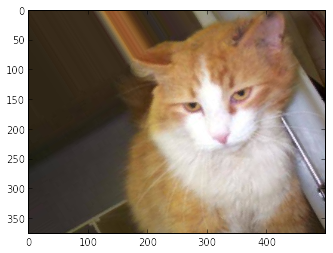

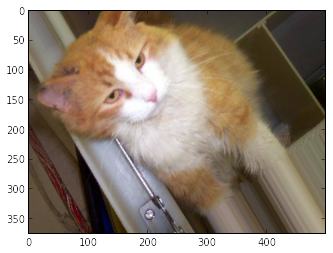

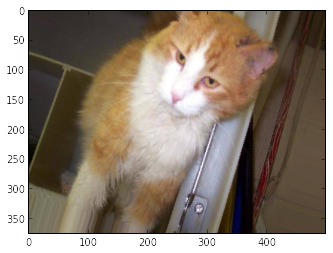

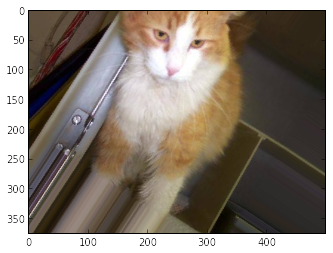

In [115]:
i = 0
for batch in train_data_generator.flow(x, batch_size=1, save_to_dir='./data/preview', save_prefix='cat',save_format='jpeg'):
    fig = plt.figure()
    plt.imshow(batch[0])
    i+=1
    if i > 5:break

In [116]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Reshape
from keras import backend as K

In [127]:
model = model_func()
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [128]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [129]:
train_generator = train_data_generator.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 750 images belonging to 2 classes.


In [130]:
validation_generator = test_datagen.flow_from_directory(
    valid_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 250 images belonging to 2 classes.


In [131]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
46/46 [==============================] - 26s - loss: 0.8078 - acc: 0.5054 - val_loss: 0.8133 - val_acc: 0.5000
Epoch 2/50
46/46 [==============================] - 24s - loss: 0.8067 - acc: 0.5066 - val_loss: 0.8218 - val_acc: 0.4915
Epoch 3/50
46/46 [==============================] - 21s - loss: 0.8107 - acc: 0.5025 - val_loss: 0.8090 - val_acc: 0.5043
Epoch 4/50
46/46 [==============================] - 21s - loss: 0.8098 - acc: 0.5035 - val_loss: 0.8133 - val_acc: 0.5000
Epoch 5/50
46/46 [==============================] - 21s - loss: 0.8068 - acc: 0.5064 - val_loss: 0.7962 - val_acc: 0.5171
Epoch 6/50
46/46 [==============================] - 21s - loss: 0.8043 - acc: 0.5089 - val_loss: 0.8090 - val_acc: 0.5043
Epoch 7/50
46/46 [==============================] - 21s - loss: 0.8263 - acc: 0.4870 - val_loss: 0.8389 - val_acc: 0.4744
Epoch 8/50
46/46 [==============================] - 21s - loss: 0.8107 - acc: 0.5025 - val_loss: 0.8218 - val_acc: 0.4915
Epoch 9/50
46/46 [======

In [133]:
save_model(model)

## Predict

In [134]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [135]:
tests = os.listdir('./data/test/')

In [136]:
tests = sorted(tests, key=lambda x: int(x.split('.')[0]))

In [137]:
res = {}

In [138]:
for fn in tests:
    image = load_img(path_join('./data/test', fn))
    image = image.resize((150,150))
    image = img_to_array(image)
    image = image.reshape((1,) + image.shape)
    res[fn] = model.predict(image)

In [139]:
for key in res:
    pro = res[key][0][0]
    res[key] = pro

In [140]:
res = {key.split('.')[0]:value for key, value in res.items()}

0.731059


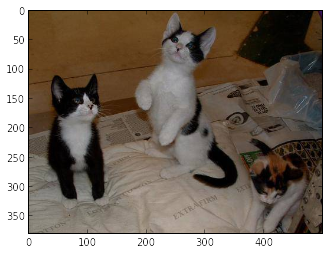

0.731059


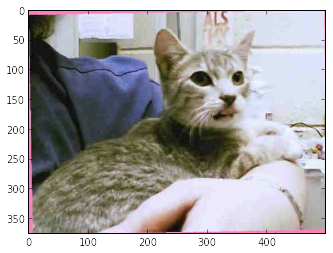

0.731059


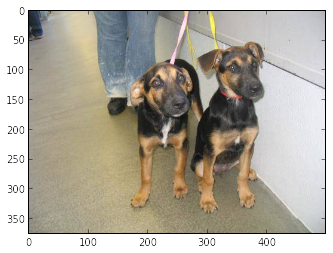

0.731059


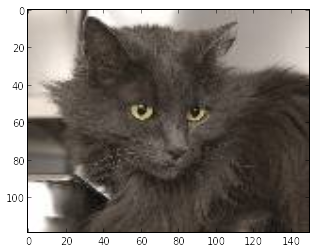

0.731059


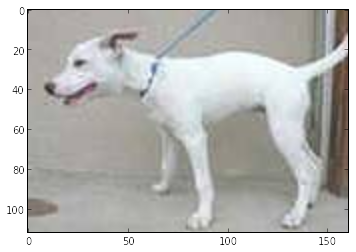

0.731059


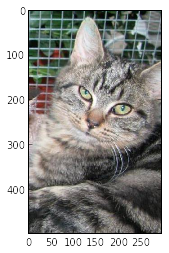

0.731059


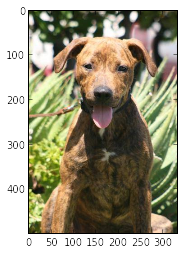

0.731059


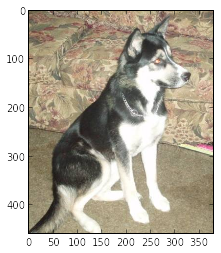

0.731059


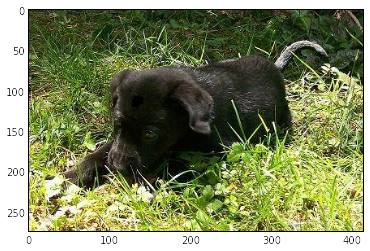

0.731059


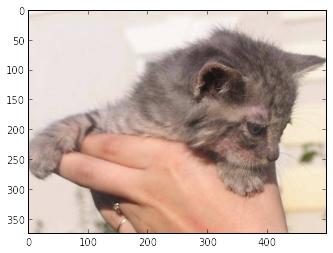

In [141]:
for fn in [random.choice(res.keys()) for i in range(10)]:
    print(res[fn])
    image = load_img(path_join('./data/test/{}.jpg'.format(fn)))
    plt.imshow(image)
    plt.show()

In [142]:
df = {'id':[], 'label':[]}
for key in res:
    df['id'].append(key)
    df['label'].append(round(res[key],2))

In [143]:
df = pd.DataFrame(df)

In [144]:
df.to_csv('./output/{}-{}-{}-{}-{}output.csv'.format(suf, train_size, epochs, batch_size, model_func.__name__),index=False)